In [19]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy
import scipy.signal as signal

In [20]:
x = loadmat('C:/Users/rajra/OneDrive/Desktop/books/analysis of neural data/Ch6-EEG-1')

In [21]:
time = x['t']
t = time[0,:]
eeg = x['EEG']

In [22]:
#plt.plot(t,eeg[9,:])

In [23]:
def compute_spectrum(e,t):
    del_t = t[1] - t[0]
    N = len(e)
    T = t[-1]
    
    e = e - np.mean(e)
    eh = np.multiply(np.hanning(N),e)
    ef = np.fft.fft(eh)
    Sxx = (2*del_t*del_t*ef*np.conj(ef))/T
    N = len(e)/2
    Sxx = Sxx[0:int(N)]
    
    df = 1/(T)
    sampling_f = 1/del_t
    nf = sampling_f/2
    faxis = np.arange(0.0, nf, df)
    plt.plot(faxis,10*np.log10(Sxx/max(Sxx)))
    

C:\Users\rajra\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


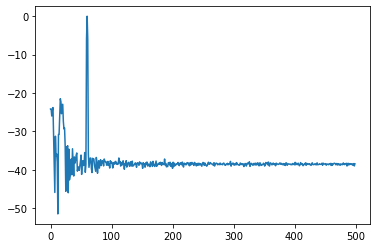

In [24]:
compute_spectrum(eeg[0,:],t)

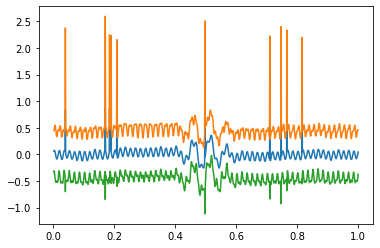

In [25]:
K = eeg.shape[0]
mn = np.mean(eeg,axis =0)
sd = np.std(eeg,axis=0)
sdmn = sd/math.sqrt(K)
plt.plot(t,mn)
plt.plot(t, mn+2*sdmn)
plt.plot(t, mn-2*sdmn)

In [26]:
def trial_averaged_Sxx(ecog):
    del_t = t[1] - t[0]
    T = (ecog.shape[1])*del_t
    K = ecog.shape[0]
    N = ecog.shape[1]
    n = N/2
    Sxx = [[]*N for i in range(K)]
    for k in range(K):
        xf = np.fft.fft(ecog[k,:]-np.mean(ecog[k,:]))
        sxx = (2*del_t*del_t*xf*np.conj(xf))/T
        Sxx[k] = [item for item in sxx]
    Sxx = [item[0:int(n)] for item in Sxx]
    Sxx = np.mean(Sxx,axis=0)
    df = 1/(T)
    sampling_f = 1/del_t
    nf = sampling_f/2
    faxis = np.arange(0.0, nf, df)
    plt.plot(faxis,10*np.log10(Sxx/max(Sxx)))
    plt.xlim(0,100)
    plt.ylim(-50,5)

C:\Users\rajra\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


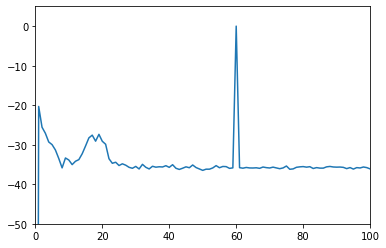

In [27]:
trial_averaged_Sxx(eeg)

In [34]:
def naive_filter(e,t):
    del_t = t[1] - t[0]
    N = len(e)
    T = t[-1]
    df = 1/(T)
    sampling_f = 1/del_t
    nf = sampling_f/2
    
    e = e - np.mean(e)
    ef = np.fft.fft(e)
    faxis = np.fft.fftshift(range(-int(nf),int(nf-df)+1,int(df)))

    indices = faxis[abs(abs(faxis) - 60) <= 1]
    print(faxis)
    rectangular_filter = np.ones(N)
    rectangular_filter[indices] = 0
    ef_filtered = np.multiply(ef,rectangular_filter)
    isorted = np.argsort(faxis)
    ef_real = np.real(ef)
    ef_filtered_real = np.real(ef_filtered)
    
    ax1 = plt.subplot(131) 
    ax1.plot(faxis[isorted],rectangular_filter[isorted])
    ax1.set_xlim(-80,80)
    #ax1.set_ylim(0,1)
    
    ax2 = plt.subplot(132)
    ax2.plot(faxis[isorted],ef_real[isorted])
    ax2.set_xlim(-80,80)
    ax2.set_ylim(-80,300)
    
    ax3 = plt.subplot(133)
    ax3.plot(faxis[isorted],ef_filtered_real[isorted])
    ax3.set_xlim(-80,80)
    ax3.set_ylim(-80,300)
    
    e_new = np.fft.ifft(ef_filtered)
    
    return e_new

    

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  195
  196 

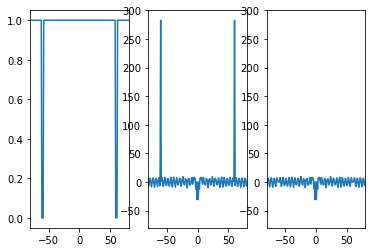

In [35]:
eeg_0_new = naive_filter(eeg[0],t)

C:\Users\rajra\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.4, 1.0)

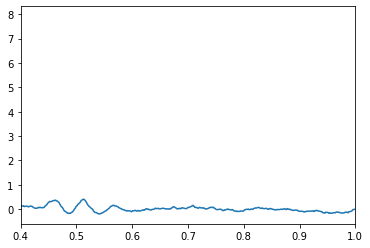

In [12]:
plt.plot(t,eeg_0_new)
plt.xlim(0.4,1.0)

In [13]:
#compute_spectrum(eeg_0_new,t)

In [14]:
def hanning_filter(e,t):
    del_t = t[1] - t[0]
    N = len(e)
    T = t[-1]
    df = 1/(T)
    sampling_f = 1/del_t
    nf = sampling_f/2
    
    e = e - np.mean(e)
    ef = np.fft.fft(e)
    faxis = np.fft.fftshift(range(-int(nf),int(nf-df)+1,int(df)))
    indices = faxis[abs(abs(faxis) - 60) <= (0.1*df)]
    win = 15
    
    hann_filter = np.ones(N)
    hann_filter[indices[0]-win:indices[0]+win+1] = 1-np.hanning((2*win)+1)
    hann_filter[indices[1]-win:indices[1]+win+1] = 1-np.hanning((2*win)+1)
    ef_filtered = np.multiply(ef,hann_filter)
    isorted = np.argsort(faxis)
    ef_real = np.real(ef)
    ef_filtered_real = np.real(ef_filtered)
    
    ax1 = plt.subplot(131) 
    ax1.plot(faxis[isorted],hann_filter[isorted])
    #ax1.set_ylim(0,1)
    
    ax2 = plt.subplot(132)
    ax2.plot(faxis[isorted],ef_real[isorted])
    ax2.set_xlim(-80,80)
    ax2.set_ylim(-80,300)
    
    ax3 = plt.subplot(133)
    ax3.plot(faxis[isorted],ef_filtered_real[isorted])
    ax3.set_xlim(-80,80)
    ax3.set_ylim(-80,300)
    
    e_new = np.fft.ifft(ef_filtered)
    return e_new

    

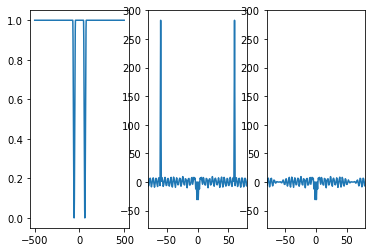

In [15]:
eeg_0_hann = hanning_filter(eeg[0],t)

C:\Users\rajra\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\rajra\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-0.2, 0.4)

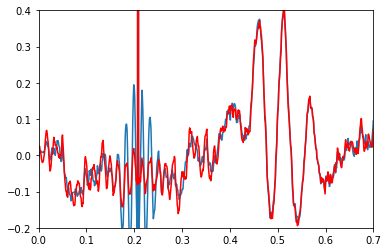

In [16]:
plt.plot(t,eeg_0_hann)
plt.plot(t,eeg_0_new,"r")
plt.xlim(0.0,0.7)
plt.ylim(-0.2,0.4)

In [17]:
def FIR_filter(e,t):
    N = len(e)
    del_t = t[1] - t[0]
    sampling_f = 1/del_t
    nf = sampling_f/2
    n=100
    wn = 30/nf
    fir_filter = signal.firwin(n, cutoff = wn, window = "hanning")
    zeros = np.zeros(N-n)
    fir_filter_a = np.append(zeros,fir_filter)
    e_new = np.zeros(N)
    for i in range(N):
        e_new[i] = np.sum(np.multiply(np.roll(fir_filter_a,-i),e))
    e_new = np.flip(e_new)
    plt.plot(t,e_new)
    

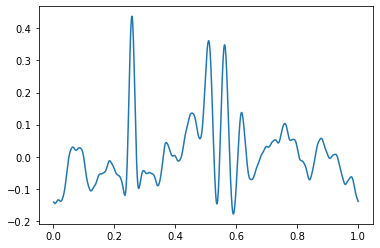

In [18]:
FIR_filter(eeg[0],t)